In [1]:
%load_ext autoreload
%autoreload 2

# 1. Generating test images

Before we begin working on mosaics generation, we'll need test data. It's often
a good practice to create an artificial dataset for some parts of algorithm
development.

The artificial test set has one significant advantage over real-world data: we
control all factors having influence on results specification. Such control allows
for building specific tests for different aspects of the algorithm we'd like to
design.

In our case, the test set generation will also be an excellent opportunity to get
acquainted with *OpenCV* drawing functions and *Numpy* arrays.

In following section we'll be working on `utils/test_images_generator` directory.

Target image will contain a set of randomly generated shapes in random colors. 
You can see example of such image below. 

![title](assets/1-test-images/test-target.jpg)

First, we'll try to recreate these images using random square splices of the
similar kind original images.

![title](assets/1-test-images/source-1.jpg) | ![title](assets/1-test-images/source-2.jpg) | ![title](assets/1-test-images/source-3.jpg) | ![title](assets/1-test-images/source-4.jpg) | ![title](assets/1-test-images/source-5.jpg)
------------------------------------------|------------------------------------------|------------------------------------------|------------------------------------------|------------------------------------------

As a mosaic result we'll be aiming for something along these lines.

![title](assets/1-test-images/test-output.jpg)

It's not perfect of course, as we won't have exact matches to image parts we'll 
want to recreate.

Let's get to work.

In [2]:
from matplotlib import pyplot as plt

In [3]:
from utils.test_images_generator.random_image_generator import generate_random_image

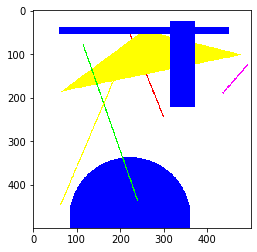

In [4]:
generated_image = generate_random_image(500, 500)
plt.imshow(generated_image)

You should see a black square above. As a first step let's try to make it white.

Take a look at the `generate_random_image` function. You will see that we are
using numpy function `zeros` that is creating array of a given shape - in our
case it will be `(height, width, 3)` - last dimension is used for color coding.
As we are filling an array with zeros the resulting image is black.

In order to make numpy arrays compatible with OpenCv, we're setting `dtype=np.uint8`.

Read about numpy's [full function](https://numpy.org/doc/1.18/reference/generated/numpy.full.html)
and use it to create an image filled with the white color (`(255, 255, 255)`).


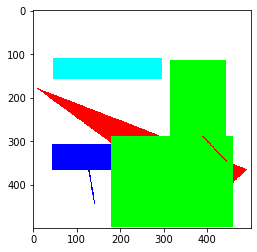

In [5]:
generated_image = generate_random_image(500, 500)
plt.imshow(generated_image)

After applying changes to the `generate_random_image` file you should see
white image after running line above. Now let's work on shapes.

Read about [`randint`](https://numpy.org/doc/1.18/reference/random/generated/numpy.random.randint.html)
and [`choice`](https://numpy.org/doc/1.18/reference/random/generated/numpy.random.choice.html)
functions and use them to generate a random list of `AVAILABLE_SHAPES_DICT` dict values.

In [6]:
from utils.test_images_generator.generator_config import AVAILABLE_SHAPES_DICT
AVAILABLE_SHAPES_DICT

{'LINE': 'LINE',
 'TRIANGLE': 'TRIANGLE',
 'RECTANGLE': 'RECTANGLE',
 'CIRCLE': 'CIRCLE'}

First pick a random integer between `5` and `10` using `randint` function and
generate list of this length made of `AVAILABLE_SHAPES_DICT` values using `choice`.

Generated image will be still white as we didn't implemented drawing functions yet. 

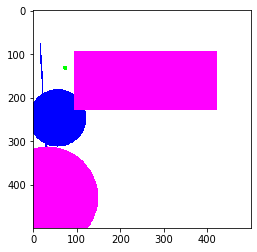

In [7]:
generated_image = generate_random_image(500, 500)
plt.imshow(generated_image)

Let's modify `_draw_random_line`, `_draw_random_rectangle`, and
`_draw_random_circle` to make them draw shapes. We'll leave 
`_draw_random_triangle` for later.

Read `OpenCV`'s [drawing functions tutorial](https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html).

Remember that all of required functions like `cv2.line` modify 
original image. This is why all of these functions get image as a parameter.

In `generator_utils` you will find two helper functions: `generate_random_color`
and `generate_random_image_points`.

`generate_random_color` is currently returning black color every time but we'll
tackle this later.
 

In [8]:
from utils.test_images_generator.generator_utils import generate_random_color, generate_random_image_points

In [9]:
generate_random_color()

(255, 0, 0)

In [10]:
generate_random_image_points(generated_image, 5)


[(477, 87), (222, 299), (464, 28), (459, 332), (21, 423)]

Code block below should display black shapes after implementing helper
function bodies. 
  

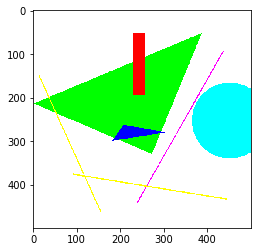

In [11]:
generated_image = generate_random_image(500, 500)
plt.imshow(generated_image)

Let's fix `generate_random_color` function to make images more readable.
Again, use `choice` function to pick random color from `AVAILABLE_COLORS_DICT`.

In [12]:
from utils.test_images_generator.generator_config import AVAILABLE_COLORS_DICT
AVAILABLE_COLORS_DICT

{'RED': (0, 0, 255),
 'GREEN': (0, 255, 0),
 'BLUE': (255, 0, 0),
 'YELLOW': (0, 255, 255),
 'PURPLE': (255, 0, 255),
 'CYAN': (255, 255, 0)}

In [13]:
generate_random_color()


(0, 255, 0)

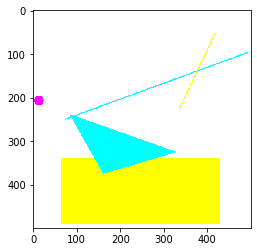

In [14]:
generated_image = generate_random_image(500, 500)
plt.imshow(generated_image)

Much better. The last shape to tackle is a triangle. To generate it use
[`fillConvexPolly`](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga3069baf93b51565e386c8e591f8418e6)
function.

You will need to use [`reshape`](https://numpy.org/doc/1.18/reference/generated/numpy.reshape.html)
function on the list returned by `generate_random_image_points` to make it 
compatible with `fillConvexPolly`. Use `(-1, 1, 2)` as a shape attribute to
make it work.

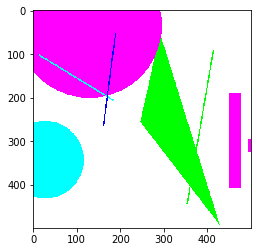

In [15]:
generated_image = generate_random_image(500, 500)
plt.imshow(generated_image)

You can use now `generate_target_image` function from `generate_images`
to generate and save new target image in `assets` directory.

Let's move to random sources generation.

## 1.2 Generating source images

The general idea for source images generation is to generate random images
using `generate_target_image` and slice them into small squares.

For the most of cases such squares will be filled with one color - either
white image background or shape content. The solution will be generating
such flat images first and then pick only these random image slices that
contain something more that just flat color.

In this chapter we'll be working on `generate_patches_set` function
from `random_image_generator`. Currently it only generates black squares
and stores them in `assets`.

In [16]:
from utils.test_images_generator.generate_images import generate_patches_set
from config import PATCH_SIZE

In [17]:
generate_patches_set('test', PATCH_SIZE, 300, 900, 500)


GENERATED 0300 OF 300 PATCHES

Let's start with generating flat color images. Again, `full` function will 
come in handy. Remember to add white color to `AVAILABLE_COLORS_DICT` values.

In [18]:
generate_patches_set('test', PATCH_SIZE, 300, 900, 500)

GENERATED 0300 OF 300 PATCHES

In order to generate the rest of patches, analyze main `generate_patches_set`
loop. Instead of assigning black square to `patch`, we'd like to select
a square from `generated_image` at `x, y` position of `patch_size` size.
Basic numpy's selecting methods will come in handy here.

You can see how we make sure that selected image isn't just a flat square and
provides an interesting content. 

The implemented method of generating source images is quite blunt but it server 
its purpose.

After applying changes `generate_patches_set` should generate nice, diverse
patches, starting with `7` plain squares.

In [19]:
generate_patches_set('test', PATCH_SIZE, 300, 900, 500)


GENERATED 0300 OF 300 PATCHES